In [1]:
import pandas as pd
import numpy as np

# Make numpcy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mat
import colordict as cd
import seaborn as sns
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from flowability_data_upload.Research import main
from flowability_data_upload.Research.main import trymodel, makemodel, modeltest
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
import math
from flowability_data_upload.Research.main import trymodel, makemodel, modeltest, Data

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cdd = []
icdd = []
cdd = ["Id", "Img Id", "Powder", "Filter0", "Filter1", "Filter2", "Filter3", "Filter4", "Filter5", "Filter6"] #general columns to drop
icdd = cdd.copy()
icdd.remove("Powder")

In [3]:
x = Data()
x.importnewpowders()
data = x.data.copy() 
datalist = x.datalist.copy()

# powders with flow
flow = x.flow.copy()
# powders with no flow
noflow = x.noflow.copy()
flowlist = x.flowpowders.copy()
noflowlist = x.noflowpowders.copy()
alldatalist = x.alldatalist.copy()

           Da      Dp  FWidth  FLength  ELength  EWidth     Volume     Area  \
0      31.076  34.663  27.644   35.973   34.802  27.871  15712.926  758.453   
1      27.162  29.344  27.434   28.583   27.432  26.912  10492.573  579.445   
2      27.239  29.955  27.099   29.289   28.443  26.148  10582.306  582.744   
3      33.260  38.347  27.040   44.811   45.210  25.836  19265.652  868.854   
4      28.584  30.520  26.918   31.386   30.804  26.592  12228.183  641.700   
...       ...     ...     ...      ...      ...     ...        ...      ...   
11313   3.482   3.924   3.218    4.275    3.876   2.981     22.097    9.520   
11314   3.459   4.264   3.532    4.816    4.121   3.167     21.665    9.396   
11315   3.403   3.871   3.314    4.106    3.789   2.953     20.627    9.093   
11316   3.398   4.532   3.888    4.532    3.881   3.094     20.549    9.070   
11317   3.343   3.997   3.378    4.466    3.924   2.931     19.567    8.779   

       Perimeter  CHull  Area  ...  Transparency  C

In [4]:
alldatalist

[      Id  Img Id      Da      Dp  FWidth  FLength  ELength  EWidth     Volume  \
 0    487     286  31.076  34.663  27.644   35.973   34.802  27.871  15712.926   
 1    227     189  27.162  29.344  27.434   28.583   27.432  26.912  10492.573   
 2    793     536  27.239  29.955  27.099   29.289   28.443  26.148  10582.306   
 3    598     327  33.260  38.347  27.040   44.811   45.210  25.836  19265.652   
 4    688     354  28.584  30.520  26.918   31.386   30.804  26.592  12228.183   
 ..   ...     ...     ...     ...     ...      ...      ...     ...        ...   
 798  137     156   4.474   4.900   3.740    5.785    5.352   3.757     46.893   
 799  215     184   4.474   4.900   3.740    5.785    5.352   3.757     46.893   
 800  632     334   5.285   5.958   3.740    7.364    7.098   3.956     77.298   
 801  692     356   3.836   4.997   3.629    5.959    4.607   3.342     29.547   
 802  186     174   4.143   6.185   3.397    7.611    6.278   2.914     37.231   
 
         Area 

In [5]:
# Powder Info
# 0: no flow, 1: bad flow, 2: good flow
plist = []

for powder in alldatalist:
    plist.append([powder["Powder"][0], len(powder.index), powder["Flow"][0], powder["Flow Class"][0]])
powderinfo = pd.DataFrame(plist, columns=["Powder", "# of Particles", "Flow", "Flow Class"])
powderinfo

,Powder,# of Particles,Flow,Flow Class
0,S1VRC0706-3_Excel.txt,803,20.013333,1
1,WIP-C1.txt,13204,21.786667,1
2,WIP-W1.txt,14877,25.786667,1
3,MW_Ti-Nb-Zr_0-63.txt,8462,33.970000,1
4,WIP-W2.txt,33839,34.310000,1
5,MW_Ti-Nb-Zr_64-150.txt,586,26.100000,1
6,MW_I_718_0-10.txt,79935,0.000000,0
7,S1VRC0706-5_Excel.txt,920,0.000000,0
8,V5_Al-P1015_99.8%-Al.txt,303,53.300000,1
9,MW_Ti-Nb_64-150.txt,684,2.380000,1


In [6]:
pflist = []
pdflist = []
fplist = []
fpdlist = []
flist = []
idlist = []
pdict = {}
for i in data.columns:
    pflist.append([])
for powder in alldatalist:
    print(powder)
    powder = powder.drop(columns = icdd)
    pid = powder["Powder"][0]
    pf = powder.drop(columns = ["Powder", "Flow", "Flow Class"])
    idlist.append(pid)
    
    #print("Powder Id: ", powder["Id"][0])
    count = 0
    feat = []
    index = []
    for f in pf:
        ilist = [powder["Powder"][0]]
        #jlist = [f]
        index.append(f)
        #print(f, ": ") #feature
        print(f)
        ft = pf[f].to_numpy()
        mean = ft.mean()
        med = np.median(ft)
        fmax = np.amax(ft)
        fmin = np.amin(ft)
        std = ft.std()
        size = ft.size
        zeros = size - np.count_nonzero(ft)
        #print(mean, "\n", med, "\n", std)
        jlist = [mean, med, std, fmax, fmin, zeros]
        flist = ["Mean", "Median", "Std", "Max", "Min", "# 0's"]
        ilist.extend(jlist)
        
        #print(ilist)
        #print(pflist)
        pflist[count].append(jlist)
        fplist.append
        feat.append(jlist)
        count = count + 1
    fplist.append(feat)
    df = pd.DataFrame(feat, columns=flist, index = index)
    for i in ["Mean", "Median", "Max", "Min", "Std"]:
        df[i] = df[i].round(4)
        df[i] = df[i].apply(lambda x: '%.5f' % x) 
    pdict[pid] = df
    fpdlist.append(df)
    
for i in pflist:
    df = pd.DataFrame(i, columns=flist, index = idlist)
    #for i in ["Mean", "Median", "Max", "Min", "Std"]:
        #df[i].round(4)
        #df[i] = df[i].apply(lambda x: '%.5f' % x) 
    df = df.round(1)
    pdflist.append(df)

pdfdict = {}
count = 0
for i in data.columns:
    pdfdict[i] = pdflist[count]
    count = count + 1

      Id  Img Id      Da      Dp  FWidth  FLength  ELength  EWidth     Volume  \
0    487     286  31.076  34.663  27.644   35.973   34.802  27.871  15712.926   
1    227     189  27.162  29.344  27.434   28.583   27.432  26.912  10492.573   
2    793     536  27.239  29.955  27.099   29.289   28.443  26.148  10582.306   
3    598     327  33.260  38.347  27.040   44.811   45.210  25.836  19265.652   
4    688     354  28.584  30.520  26.918   31.386   30.804  26.592  12228.183   
..   ...     ...     ...     ...     ...      ...      ...     ...        ...   
798  137     156   4.474   4.900   3.740    5.785    5.352   3.757     46.893   
799  215     184   4.474   4.900   3.740    5.785    5.352   3.757     46.893   
800  632     334   5.285   5.958   3.740    7.364    7.098   3.956     77.298   
801  692     356   3.836   4.997   3.629    5.959    4.607   3.342     29.547   
802  186     174   4.143   6.185   3.397    7.611    6.278   2.914     37.231   

        Area  ...  Filter4 

Compactness
Roundness
Ellipse Ratio
Circularity
Solidity
Concavity
Convexity
Extent
hash
Transparency
Curvature
Surface Area
L/W Ratio
W/L Aspect Ratio
CHull Surface Area
Ellipticity
      Id  Img Id      Da      Dp  FWidth  FLength  ELength  EWidth     Volume  \
0    223     252  44.723  48.830  44.903   46.985   45.346  44.150  46836.890   
1    326     279  47.089  48.919  44.901   50.022   49.450  44.838  54672.672   
2     81     205  44.754  48.572  44.899   46.778   45.529  44.025  46935.508   
3    539     339  45.135  52.216  44.881   48.543   45.900  44.441  48145.238   
4    683     371  45.178  47.920  44.822   47.296   45.912  44.467  48280.096   
..   ...     ...     ...     ...     ...      ...      ...     ...        ...   
915   38     186   6.942   8.967   6.758   10.841    7.973   6.132    175.150   
916  138     224   7.846   9.471   6.690   10.111    9.906   6.283    252.926   
917  743     389   7.088   7.824   6.325    8.369    8.256   6.084    186.482   
918  84

Dp
FWidth
FLength
ELength
EWidth
Volume
Area
Perimeter
CHull  Area
CHull Perimeter
Sphericity
Compactness
Roundness
Ellipse Ratio
Circularity
Solidity
Concavity
Convexity
Extent
hash
Transparency
Curvature
Surface Area
L/W Ratio
W/L Aspect Ratio
CHull Surface Area
Ellipticity
          Id  Img Id      Da      Dp  FWidth  FLength  ELength  EWidth  \
0       1234     128  60.989  75.562  50.674   78.487   81.734  47.789   
1       1339     131  60.775  74.831  41.658   89.774   98.743  40.094   
2       8451     292  60.724  76.682  44.338   87.373   97.261  41.918   
3       1890     146  59.274  79.141  48.087   82.893   93.782  43.641   
4       6267     241  57.546  72.956  43.547   84.227   83.189  40.947   
...      ...     ...     ...     ...     ...      ...      ...     ...   
11704   1845     144   4.063   5.366   4.299    5.690    5.004   3.632   
11705   1413     133   3.884   4.111   3.368    4.511    4.196   3.388   
11706   1989     148   3.737   4.232   3.497    4.881    

Compactness
Roundness
Ellipse Ratio
Circularity
Solidity
Concavity
Convexity
Extent
hash
Transparency
Curvature
Surface Area
L/W Ratio
W/L Aspect Ratio
CHull Surface Area
Ellipticity
      Id  Img Id      Da      Dp  FWidth  FLength  ELength  EWidth     Volume  \
0     65     196  36.531  42.839  37.266   39.259   37.600  35.547  25525.714   
1     40     153  37.578  40.896  37.142   39.958   38.547  36.673  27783.850   
2    131     350  32.730  36.151  32.754   34.959   33.616  31.914  18358.210   
3     13     109  29.493  33.858  29.922   31.889   30.738  28.354  13432.776   
4    108     277  30.085  31.982  29.122   32.333   30.757  29.474  14258.263   
..   ...     ...     ...     ...     ...      ...      ...     ...        ...   
170    2      90   6.192   6.802   5.820    7.746    6.760   5.687    124.299   
171   99     262   5.377   6.252   4.430    7.563    6.901   4.135     81.404   
172    6      97   4.586   5.914   4.222    7.223    5.269   4.010     50.495   
173   9

In [7]:
cols = []
for i in data.columns:
    cols.append(i)
cols.remove("Flow")
cols.remove("Flow Class")

def featurestat(stat):
    plist = []
    for powder in alldatalist:
        tlist = []

        for feature in cols:
            tlist.append(pdict.get(powder["Id"][0])[stat][feature])
        tlist.extend([powder["Flow"][0], powder["Flow Class"][0]])
        plist.append(tlist)
    df = pd.DataFrame(plist, columns = data.columns, index = idlist)
    df = df.astype(float)
    return df

In [12]:
data

,Da,Dp,FWidth,FLength,ELength,EWidth,Volume,Area,Perimeter,CHull Area,...,Transparency,Curvature,Surface Area,L/W Ratio,W/L Aspect Ratio,CHull Surface Area,Ellipticity,Flow,Flow Class,Powder
0,31.076,34.663,27.644,35.973,34.802,27.871,15712.926,758.453,108.897,803.897,...,0.318,0.0,3033.813,1.301,0.768,3215.587,1.249,20.013333,1,S1VRC0706-3_Excel.txt
1,27.162,29.344,27.434,28.583,27.432,26.912,10492.573,579.445,92.187,602.148,...,0.329,0.0,2317.780,1.042,0.960,2408.590,1.019,20.013333,1,S1VRC0706-3_Excel.txt
2,27.239,29.955,27.099,29.289,28.443,26.148,10582.306,582.744,94.107,611.136,...,0.336,0.0,2330.975,1.081,0.925,2444.545,1.088,20.013333,1,S1VRC0706-3_Excel.txt
3,33.260,38.347,27.040,44.811,45.210,25.836,19265.652,868.854,120.471,930.055,...,0.280,0.0,3475.415,1.657,0.603,3720.222,1.750,20.013333,1,S1VRC0706-3_Excel.txt
4,28.584,30.520,26.918,31.386,30.804,26.592,12228.183,641.700,95.881,666.650,...,0.321,0.0,2566.800,1.166,0.858,2666.602,1.158,20.013333,1,S1VRC0706-3_Excel.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11313,3.482,3.924,3.218,4.275,3.876,2.981,22.097,9.520,12.328,10.204,...,0.449,0.0,38.081,1.328,0.753,40.815,1.300,0.000000,0,Valimet_6061_SPE.txt
11314,3.459,4.264,3.532,4.816,4.121,3.167,21.665,9.396,13.395,10.177,...,0.459,0.0,37.583,1.363,0.733,40.708,1.301,0.000000,0,Valimet_6061_SPE.txt
11315,3.403,3.871,3.314,4.106,3.789,2.953,20.627,9.093,12.161,9.871,...,0.450,0.0,36.373,1.239,0.807,39.485,1.283,0.000000,0,Valimet_6061_SPE.txt
11316,3.398,4.532,3.888,4.532,3.881,3.094,20.549,9.070,14.237,11.551,...,0.431,0.0,36.281,1.166,0.858,46.203,1.255,0.000000,0,Valimet_6061_SPE.txt


8483/8483 [==============================] - 6s 694us/step - loss: 3436233.7500
Epoch 1/10
8483/8483 [==============================] - 7s 745us/step - loss: 0.2389
Epoch 2/10
8483/8483 [==============================] - 7s 821us/step - loss: 0.2124
Epoch 3/10
8483/8483 [==============================] - 6s 735us/step - loss: 0.2140
Epoch 4/10
8483/8483 [==============================] - 6s 744us/step - loss: 0.2112
Epoch 5/10
8483/8483 [==============================] - 6s 749us/step - loss: 0.2006
Epoch 6/10
8483/8483 [==============================] - 7s 831us/step - loss: 0.2062
Epoch 7/10
8483/8483 [==============================] - 6s 761us/step - loss: 0.2137
Epoch 8/10
8483/8483 [==============================] - 6s 730us/step - loss: 0.2122
Epoch 9/10
8483/8483 [==============================] - 6s 743us/step - loss: 0.2122
Epoch 10/10
4733/4733 [==============================] - 4s 697us/step - loss: 3749267.5000
Epoch 1/10
4733/4733 [==============================] - 4s 736u

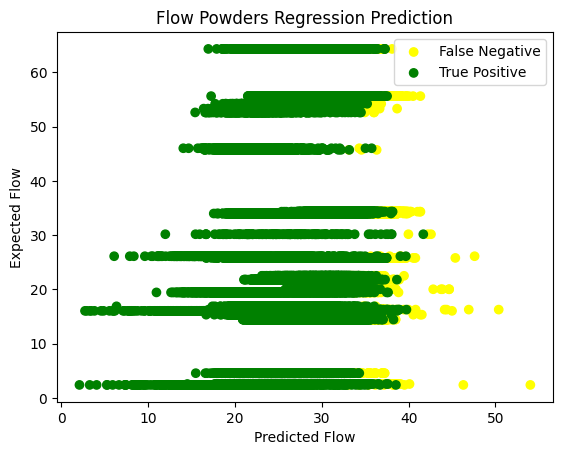

R:  23.7765 %  R^2:  5.6532 %


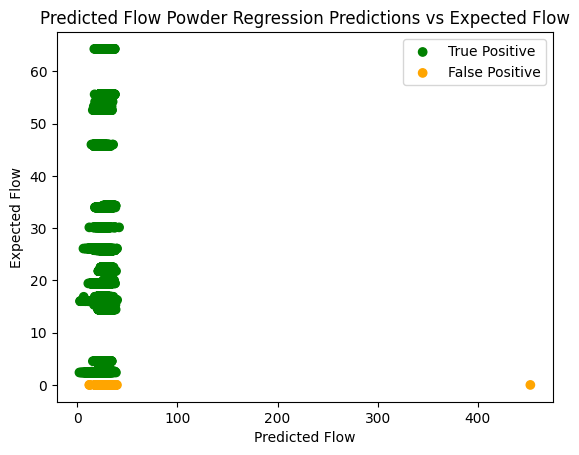

R:  0.2819 %  R^2:  0.0008 %


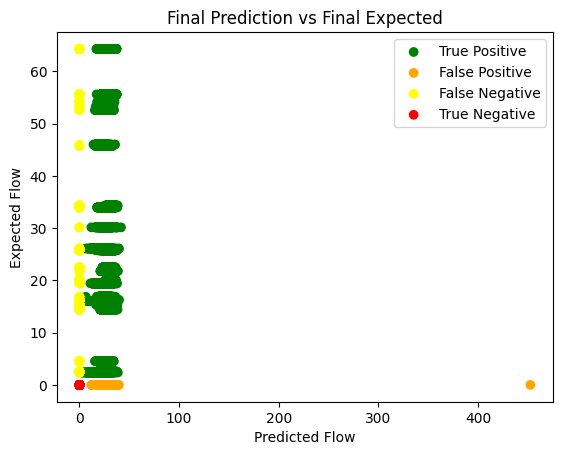

R:  27.4554 %  R^2:  7.538 %


[18.9599, 5.6532, 0.0008, 7.538]

In [16]:
classData = data
regdata = flow
testData = data
trymodel(data.drop(columns=["Powder"]), flow.drop(columns=["Powder"]), data.drop(columns=["Powder"]))